In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = "./Renewable_Energy_Adoption.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()
df["adoption"].value_counts()

adoption
0    85
1    15
Name: count, dtype: int64

In [7]:
df.isna().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
adoption              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   adoption            100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [8]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [21]:
X = df.iloc[:,:-1]
y = df["adoption"]

In [23]:
X_trian,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [25]:
print(f"X_trian Shape: {X_trian.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_trian Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_trian Shape: (80, 4)
X_test Shape: (20, 4)
y_trian Shape: (80,)
y_test Shape: (20,)


In [28]:
model = DecisionTreeClassifier(max_depth=3,random_state=42)
model

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
model.fit(X_trian,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_pred=y_pred,y_true=y_test)
precision = precision_score(y_pred=y_pred,y_true=y_test)
recall = recall_score(y_pred=y_pred,y_true=y_test)

In [36]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)

In [37]:
conf_matrix

array([[16,  1],
       [ 2,  1]])

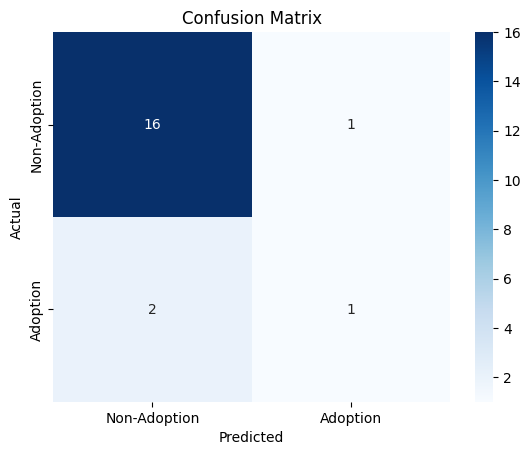

In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



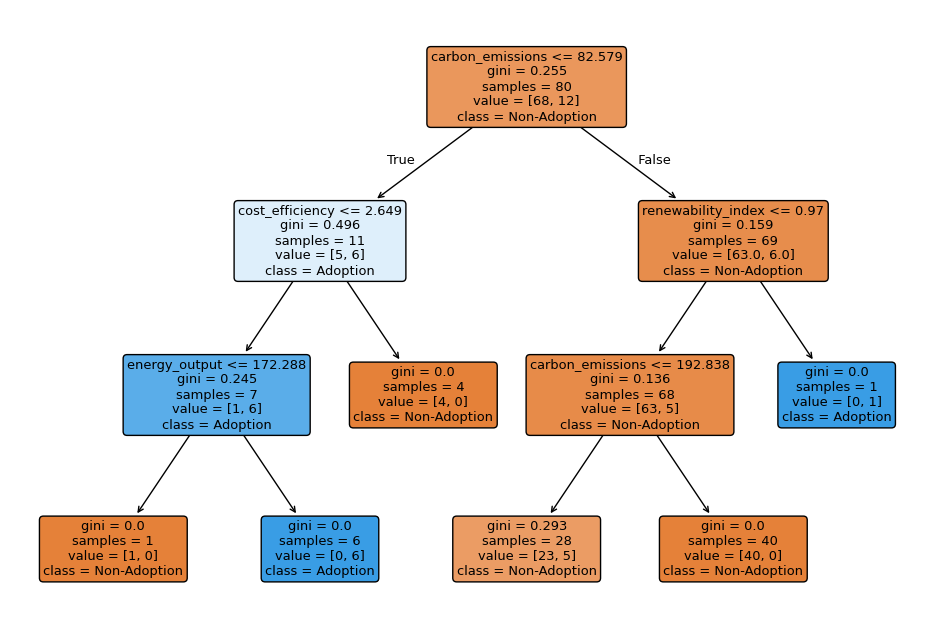

In [51]:
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X_trian.columns,class_names=['Non-Adoption', 'Adoption'],filled=True,rounded=True)
plt.savefig("decision_tree.png")
plt.show()

In [52]:
import joblib
joblib.dump(model,"Renewable_Energy_Adoption_model.pk")

['Renewable_Energy_Adoption_model.pk']